# Human Resources Analytics

This is project number two for my Data Visualization class. For this project we were tasked with the following:
1.) Select a dataset of our choosing
2.) Chop the dataset using pandas
3.) Clean the dataset and drop missing values if needed
4.) Create two types of visualization minimum
5.) Create an excellent readme file
6.) Push to Github and Kaggle

## About the Dataset
For this project I have chosen to use a Human Resources dataset which focuses on company turnover.  This dataset is super clean and contains no missing values so it is very easy to work with as a newer python user.

## Importing the data

In [19]:
# First we must import the necessary modules for data manipulation and visual representation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [20]:
# Now that we have all the modules loaded in we can now read the analytics csv
# file and store our dataset into a dataframe called "HR_DF"
HR_DF=pd.read_csv("HR_comma_sep.csv")

## Cleaning the Data

As stated before, this dataset is very clean and needs very little adjustments made to it.  The only real changes that are made were to make the table more readible as we will see later in this project.

In [21]:
# Even though the data is very clean in this dataset we should still
# check for any missing values.  To do this we enter:
HR_DF.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [22]:
# Let's take a look at a quick overview of what exactly is in our dataset
HR_DF.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
# That looks good but we should rename certain columns for better readability
HR_DF = HR_DF.rename(columns={'satisfaction_level': 'satisfaction',
                             'last_evaluation': 'evaluation',
                             'number_project': 'projectCount',
                             'average_montly_hours': 'AVG_MonthlyHours',
                             'time_spend_company': 'yearsAtCompany',
                             'Work_accident': 'workAccident',
                             'promotion_last_5years': 'promotion',
                             'sales': 'department',
                             'left': 'turnover'
                             })

In [24]:
# Now let's take a look at the table again
HR_DF.head()

,satisfaction,evaluation,projectCount,AVG_MonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
# The table is now much more readible but the focus on this project is to see
# the employee turnover rate so let's move the variable "turnover"
# to the front of the table.
front = HR_DF['turnover']
HR_DF.drop(labels=['turnover'], axis=1,inplace = True)
HR_DF.insert(0, 'turnover', front)
HR_DF.head()

,turnover,satisfaction,evaluation,projectCount,AVG_MonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


## The Data (What We Are Working With)

This dataset includes:

* 15,000 observed employees
* 10 features of observation

In [26]:
# Each row indicates an employee.  As we can see we have roughly 15,000
# employees and 10 feature that are observed.
HR_DF.shape

(14999, 10)

In [27]:
# Before we start any exploring the data we must know the "type" of
# our features.
HR_DF.dtypes

turnover              int64
satisfaction        float64
evaluation          float64
projectCount          int64
AVG_MonthlyHours      int64
yearsAtCompany        int64
workAccident          int64
promotion             int64
department           object
salary               object
dtype: object

In [28]:
# Let's start with figuring out the turnover rate.  To do this we will use
# cross validation which will take the values in the 'turnover' column
# and divide it by the length of the dataset.
# As we can see about 76% of employees stayed and roughly 24% left the company.
turnover_rate = HR_DF.turnover.value_counts() / len(HR_DF)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [29]:
# The easiest way to show the statistical overview of the employees
# is to use the describe function
HR_DF.describe()

,turnover,satisfaction,evaluation,projectCount,AVG_MonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [30]:
# But since we are focusing on turnover we can look at a summary
# of (Turnover vs. Non-turnover)
turnover_summary = HR_DF.groupby('turnover')
turnover_summary.mean()

,satisfaction,evaluation,projectCount,AVG_MonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## General Data Visualization

First we will look at various histograms of the features to get a better understanding of the data we are looking at.

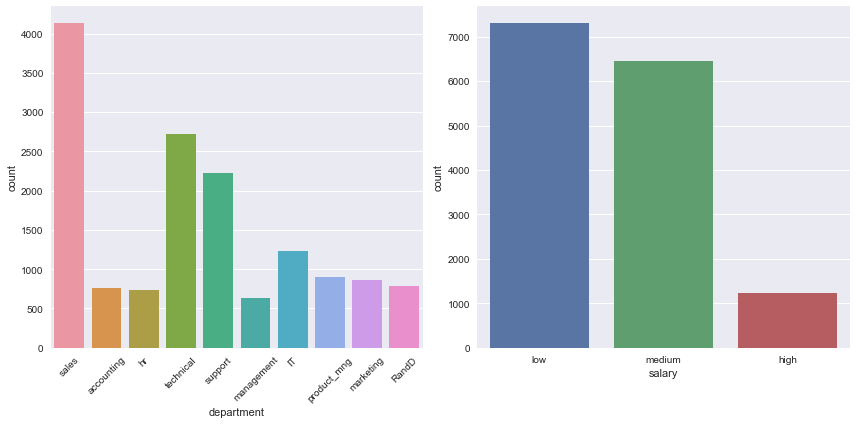

In [31]:
# These first two histograms will show us what department the employees
# do in the company and where they are in salary.  We do the code
# as follows:
fig, axs = plt.subplots(ncols=2,figsize=(12,6))
x = sns.countplot(HR_DF['department'], ax=axs[0])
plt.setp(x.get_xticklabels(), rotation=45)
y = sns.countplot(HR_DF['salary'], ax=axs[1])
plt.tight_layout()
plt.show()

We can conclude from the above two histograms the following things:
* The sales department has the highest number of employees
* The majority of employees in this dataset have a low to medium salary

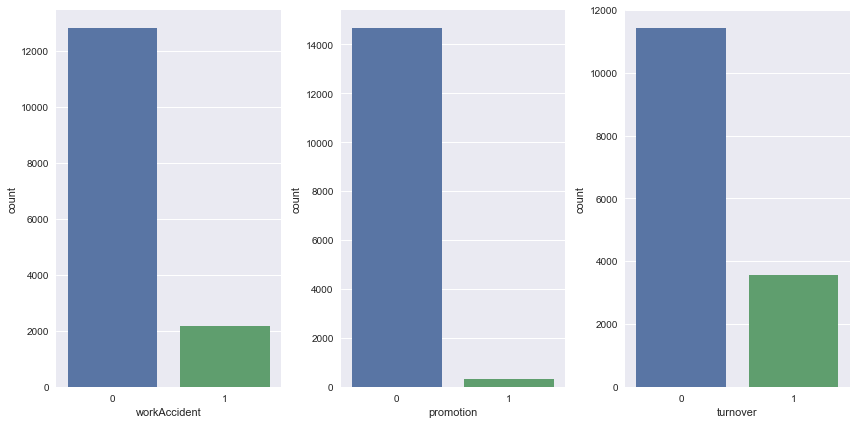

In [32]:
# Next lets look at employees who have had a work accident,
# promotion within the last 5 years, and has left the company.
# For these histograms:
# 0 = No
# 1 = Yes

fig, axs = plt.subplots(ncols=3,figsize=(12,6))
sns.countplot(HR_DF["workAccident"], ax=axs[0])
sns.countplot(HR_DF["promotion"], ax=axs[1])
sns.countplot(HR_DF["turnover"], ax=axs[2])
plt.tight_layout()
plt.show()

The previous histograms show the following:
* The majority of workers have not had a work related accident
* Very few have recieved a promotion within the past 5 years
* The average turnover for the company is roughly 25%

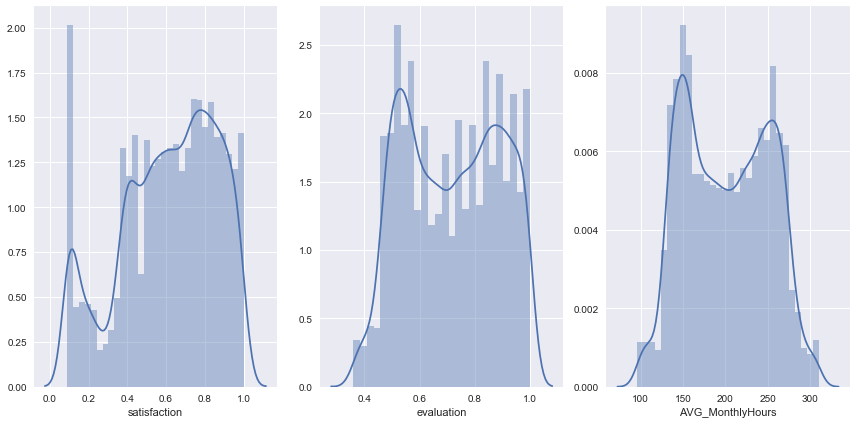

In [33]:
# Next we will take a look at employee satisfaction,
# employee evaluation, and average monthly hours:

fig, axs = plt.subplots(ncols=3,figsize=(12,6))
sns.distplot(HR_DF["satisfaction"], ax=axs[0])
sns.distplot(HR_DF["evaluation"], ax=axs[1])
sns.distplot(HR_DF["AVG_MonthlyHours"], ax=axs[2])
plt.tight_layout()
plt.show()

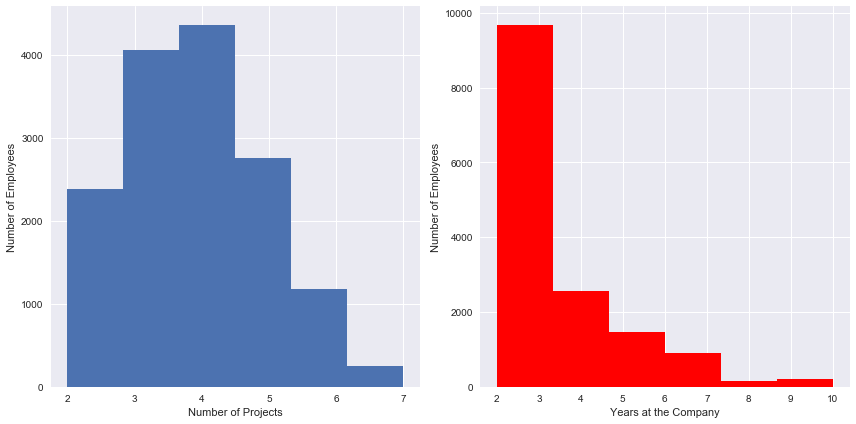

In [34]:
# Our final two charts show the number of projects given to
# employees and time spent with the company:

fig, axs = plt.subplots(ncols=2,figsize=(12,6))
axs[0].hist(HR_DF["projectCount"],bins=6)
axs[0].set_xlabel("Number of Projects")
axs[0].set_ylabel("Number of Employees")
axs[1].hist(HR_DF["yearsAtCompany"],bins=6,color='r')
axs[1].set_xlabel("Years at the Company")
axs[1].set_ylabel("Number of Employees")
plt.tight_layout()
plt.show()

## The Heatmap

Below is a heatmap and correlation matrix showing different factors and how relavant they are to each other.
Some key findings include:
* Satisfaction vs. Turnover: -0.388375
    * Since this is a negative relationship, these two are highly correlated.  This could mean the least satisfied employees are more likely to leave.
* AVG_MonthlyHours vs. projectCount: 0.417211
    * A positive relationship that is moderately correlated.  Most likely due to more projects = more hours spent working.  Which leads us to our next one:
* projectCount vs evaluation: 0.349333
    * Another positive relationship that is moderately correlated.  Most likely due to employees who work on more projects are evaluated more than those who do not.

,turnover,satisfaction,evaluation,projectCount,AVG_MonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
AVG_MonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


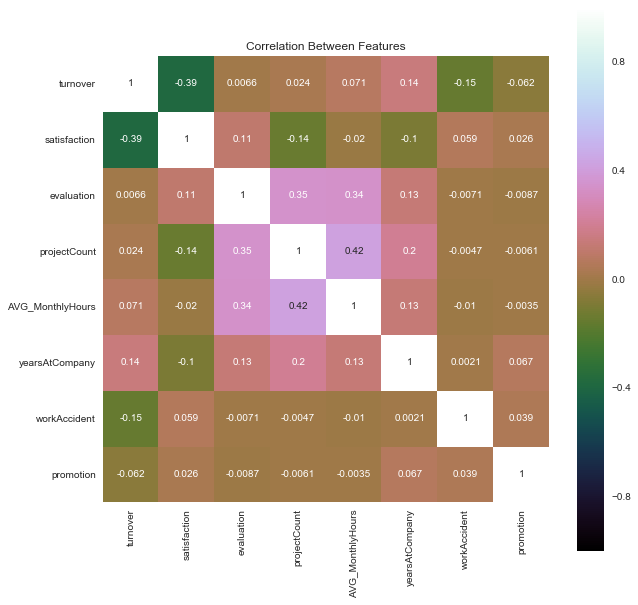

In [35]:
# Let's take a look at a heat map to better correlate our data:
correlation = HR_DF.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

plt.title('Correlation Between Features')

correlation

## Summary
Based on the data interpreted in this dataset, we can conlude the following:
* The least satisfied employees within the company are more likely to have a higher turnover rate.
    * Highest indicator of employee turnover.
* Higher project count leads to more hours worked.  However, employees are more likely to leave when they are overworked or underworked.
* The majority of employees have a low to medium salary.  This also happens to be where the bulk of employee turnover lies.